In [86]:
!ls ../experiments/corr_time

darts_pt_0.txt	disc-zc-0.txt  disczc.txt   tenas_3.txt  zc-3.txt
darts_pt_1.txt	disc-zc-1.txt  tenas_0.txt  zc-0.txt	 zcpt.txt
darts_pt_2.txt	disc-zc-2.txt  tenas_1.txt  zc-1.txt
darts_pt_3.txt	disc-zc-3.txt  tenas_2.txt  zc-2.txt


In [87]:
import os
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

In [88]:
def parse_valid_acc(l):
    return float(l.split()[3])

In [89]:
def parse_zc(l):
    zcs = []
    ls = l.split()
    #print(l)
    for ll in ls[2:]:
        v = float(ll.strip('[,]'))
        zcs.append(v)
    return zcs
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [90]:
d = '../experiments/corr_time'
seeds_tenas = []
for fname in ['tenas_0.txt','tenas_1.txt','tenas_2.txt','tenas_3.txt']:
    f = os.path.join(d,fname)

    res_tenas = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            #print(l, end='')
            sc = parse_zc(l)
            sc = chunks(sc, 5)
            #print(sc)
            for x in sc:
                res_tenas[curr_iter].append(x)
                curr_edge+=1
            print(curr_iter,curr_edge)
            if curr_edge == 6-curr_iter:
                #print('inside', curr_iter)
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_tenas.append([])
    seeds_tenas.append(res_tenas)
for x in seeds_tenas:
    for n in x:
        print(n, '\n')

0 6
1 5
2 4
3 3
4 2
5 1
0 6
1 5
2 4
3 3
4 2
5 1
0 6
1 5
2 4
3 3
4 2
5 1
0 6
1 5
2 4
3 3
4 2
5 1
[[29.0, 51.0, 21.5, 19.0, 47.0], [29.0, 8.5, 31.5, 23.0, 31.0], [22.5, 20.5, 38.0, 25.0, 19.0], [30.0, 45.0, 40.5, 32.0, 41.0], [40.0, 30.0, 31.0, 33.0, 32.0], [33.0, 10.0, 31.5, 37.5, 18.0]] 

[[8.0, 42.0, 39.0, 33.0, 26.0], [34.0, 33.0, 34.0, 11.5, 20.5], [27.5, 13.5, 31.5, 14.0, 32.0], [26.5, 34.0, 8.0, 16.0, 28.0], [21.0, 24.0, 35.5, 19.5, 13.0]] 

[[32.0, 17.5, 17.0, 21.0, 16.0], [20.0, 4.0, 13.0, 21.5, 24.0], [8.0, 24.5, 8.0, 21.0, 17.0], [23.0, 22.5, 38.0, 30.0, 22.0]] 

[[14.0, 16.0, 20.0, 22.0, 9.0], [15.0, 4.0, 14.0, 5.0, 22.0], [20.0, 12.0, 19.0, 19.0, 14.0]] 

[[14.0, 9.0, 3.0, 10.0, 9.0], [12.0, 14.0, 9.0, 12.0, 8.0]] 

[[6.0, 2.0, 8.0, 7.0, 2.0]] 

[[42.0, 50.0, 19.0, 41.0, 29.5], [18.0, 4.0, 36.0, 16.0, 57.0], [16.5, 47.0, 36.0, 24.0, 21.0], [31.0, 31.0, 46.0, 19.0, 50.0], [13.5, 33.0, 14.5, 23.0, 34.0], [14.0, 57.0, 29.0, 27.0, 21.0]] 

[[37.0, 11.0, 20.0, 11.0, 20.5], [16.5,

In [91]:
d = '../experiments/corr_time/'

seeds_dartspt = []
for fname in ['darts_pt_0.txt','darts_pt_1.txt','darts_pt_2.txt','darts_pt_3.txt']:
    f = os.path.join(d,fname)

    res_dartspt = [[]]

    start_parse = False
    curr_op = 0
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if 'project' in l:
            start_parse = True

        if start_parse and 'valid_acc' in l:
            vacc = parse_valid_acc(l)
            print(curr_iter,curr_edge,curr_op,vacc)
            if curr_op == 0:
                res_dartspt[curr_iter].append([])
            res_dartspt[curr_iter][curr_edge].append(vacc)
            curr_op += 1
            if curr_op == 5:
                curr_edge += 1
                curr_op = 0
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                if curr_iter == 6:
                    break
                res_dartspt.append([])
                curr_edge = 0 #curr_edge
                curr_op = 0
                start_parse = False
    seeds_dartspt.append(res_dartspt)


0 0 0 85.636002
0 0 1 12.372
0 0 2 76.888
0 0 3 57.067997
0 0 4 85.748001
0 1 0 85.643997
0 1 1 32.804001
0 1 2 83.283997
0 1 3 80.304001
0 1 4 85.855995
0 2 0 85.559998
0 2 1 82.792
0 2 2 83.916
0 2 3 79.503998
0 2 4 85.720001
0 3 0 85.807999
0 3 1 10.875999
0 3 2 77.279999
0 3 3 55.267998
0 3 4 85.607994
0 4 0 85.391998
0 4 1 49.995998
0 4 2 79.587997
0 4 3 79.783997
0 4 4 85.568001
0 5 0 85.671997
0 5 1 45.335999
0 5 2 77.835999
0 5 3 72.776001
0 5 4 85.743996
1 0 0 81.028
1 0 1 46.691998
1 0 2 77.711998
1 0 3 71.615997
1 0 4 81.419998
1 1 0 81.335999
1 1 1 78.307999
1 1 2 80.167999
1 1 3 77.103996
1 1 4 81.267998
1 2 0 81.075996
1 2 1 12.427999
1 2 2 71.423996
1 2 3 40.112
1 2 4 81.307999
1 3 0 81.400002
1 3 1 12.575999
1 3 2 70.984001
1 3 3 73.939995
1 3 4 81.187996
1 4 0 81.071999
1 4 1 61.119999
1 4 2 70.675995
1 4 3 58.396
1 4 4 81.512001
2 0 0 80.811996
2 0 1 80.152
2 0 2 78.888
2 0 3 68.667999
2 0 4 80.875999
2 1 0 80.851997
2 1 1 11.384
2 1 2 70.012001
2 1 3 28.983999
2 1 4 

In [92]:
def parse_zc(l):
    zcs = []
    ls = l.split()
    for ll in ls[2:]:
        v = float(ll.strip('[,]'))
        zcs.append(v)
    return zcs

In [93]:
d = '../experiments/corr_time/'

seeds_zc = []
for fname in ['zc-0.txt','zc-1.txt','zc-2.txt','zc-3.txt']:
    f = os.path.join(d,fname)
    res_zcpt = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_zcpt[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_zcpt.append([])
    seeds_zc.append(res_zcpt)


2021-06-03 16:04:47,153 [3454.2227, 3448.5942, 3439.917, 3443.5508, 3459.2842]
0 0
2021-06-03 16:04:50,367 [3454.2227, 3451.5684, 3442.229, 3443.3025, 3456.3674]
0 1
2021-06-03 16:04:53,595 [3454.2227, 3453.9937, 3443.8208, 3443.2834, 3455.4973]
0 2
2021-06-03 16:04:56,804 [3454.2227, 3437.5054, 3446.7268, 3446.9026, 3448.9456]
0 3
2021-06-03 16:05:00,010 [3454.2227, 3450.4873, 3444.7363, 3444.004, 3453.9998]
0 4
2021-06-03 16:05:03,251 [3454.2227, 3450.7974, 3445.511, 3442.5146, 3455.8496]
0 5
2021-06-03 16:05:09,942 [3410.4263, 3398.2515, 3399.248, 3399.6084, 3406.341]
1 0
2021-06-03 16:05:13,228 [3410.4263, 3412.3748, 3400.7766, 3399.6194, 3413.2373]
1 1
2021-06-03 16:05:16,473 [3410.4263, 3388.5095, 3411.0461, 3396.8948, 3405.5454]
1 2
2021-06-03 16:05:19,746 [3410.4263, 3413.923, 3399.1729, 3396.2065, 3415.4045]
1 3
2021-06-03 16:05:22,992 [3410.4263, 3407.433, 3396.2961, 3396.5044, 3414.144]
1 4
2021-06-03 16:05:29,761 [3407.7637, 3410.3164, 3397.7993, 3396.4685, 3410.7139]
2 0
2

In [94]:
f = '../experiments/corr_time/'

seeds_disczc = []
for fname in ['disc-zc-0.txt','disc-zc-1.txt','disc-zc-2.txt','disc-zc-3.txt']:
    f = os.path.join(d,fname)
    res_disczc = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_disczc[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 6-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 6:
                    break
                res_disczc.append([])
    seeds_disczc.append(res_disczc)


2021-06-03 15:52:30,639 [3316.003, 3438.0012, 3413.2087, 3432.9817, 3416.1028]
0 0
2021-06-03 15:52:33,902 [3428.7197, 3437.0376, 3435.4497, 3431.406, 3423.3008]
0 1
2021-06-03 15:52:37,187 [3433.571, 3433.8398, 3443.7656, 3445.2422, 3428.0576]
0 2
2021-06-03 15:52:40,438 [3424.0, 3461.4963, 3357.588, 3367.761, 3432.379]
0 3
2021-06-03 15:52:43,698 [3430.171, 3440.027, 3429.592, 3429.0125, 3428.4807]
0 4
2021-06-03 15:52:46,978 [3430.5894, 3441.179, 3396.8386, 3448.0854, 3427.4749]
0 5
2021-06-03 15:52:53,784 [3414.3362, 3413.9211, 3424.0278, 3424.2869, 3402.0547]
1 0
2021-06-03 15:52:57,114 [3413.5808, 3414.1265, 3426.38, 3419.6377, 3402.1987]
1 1
2021-06-03 15:53:00,408 [3407.8691, 3433.8674, 3372.503, 3394.5388, 3408.7925]
1 2
2021-06-03 15:53:03,745 [3406.4036, 3434.4802, 3391.901, 3382.271, 3408.9995]
1 3
2021-06-03 15:53:07,037 [3418.309, 3420.8384, 3371.0635, 3434.9365, 3404.9487]
1 4
2021-06-03 15:53:13,909 [3390.4182, 3395.8423, 3402.9373, 3401.1304, 3381.6711]
2 0
2021-06-03 

In [95]:
seeds_discacc = []
for dacc in [disc_acc_raw_25_s0,disc_acc_raw_25_s1,disc_acc_raw_25_s2,disc_acc_raw_25_s3]:
    res_discacc = []
    for ite in range(100,250,25):
        it = (ite-100)//25
        res_discacc.append([])
        for e in range(it, 6):
            print(it,ite,e)
            res_discacc[it].append([])
            for o in range(5):
                res_discacc[it][e-it].append(dacc[ite][e][o])
    seeds_discacc.append(res_discacc)

0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5
0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5
0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5
0 100 0
0 100 1
0 100 2
0 100 3
0 100 4
0 100 5
1 125 1
1 125 2
1 125 3
1 125 4
1 125 5
2 150 2
2 150 3
2 150 4
2 150 5
3 175 3
3 175 4
3 175 5
4 200 4
4 200 5
5 225 5


In [96]:
import csv
m_names = {
    'acc':'avg-acc',
    'best-acc':'best-acc',
    'discrete acc darts':'disc-acc',
    'dartspt':'darts-pt',
    'zc pt':'zc-pt',
    'discrete zc':'disc-zc',
    'alpha':'darts-100',
    'alpha-60':'darts',
    'tenaspt':'tenas',
}
ops=[]
edge = 0
num_edges = 6
op_strengths = []
for e in range(num_edges):
    op_strengths.append({})

with open('op_strength_src.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            ops = row[1:-1]
            line_count += 1
        else:
            #print(row)
            if row == ['', '', '', '', '', '', '']:
                edge += 1
                line_count += 1
                continue
            #parse row
            method = m_names[row[0]]
            op_strengths[edge][method] = []
            for r in row[1:-1]:
                if '±' in r:
                    r1 = r.split('±')[0]
                    r2 = r.split('±')[1]
                    r=r1
                metric = float(r)
                op_strengths[edge][method].append(metric)
            line_count += 1
print(ops)

['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']


In [97]:
sq_op_strengths = {}
for k in op_strengths[0].keys():
    if 'acc' not in k:
        continue
    sq_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'acc' not in k:
            continue
        if 'pt' in k or 'tenas' in k:
            sq_op_strengths[k].append([-vv for vv in v])
        else:
            sq_op_strengths[k].append(v)

In [98]:
res_bestacc = []
for ite in range(6):
    res_bestacc.append([])
    for i,edges in enumerate(sq_op_strengths['best-acc']):
        if i >= ite:
            res_bestacc[ite].append(edges)
    

In [99]:
from scipy import stats
correls = {}
for n,res in [('darts-pt',res_dartspt), ('zc-pt',res_zcpt), ('disc-zc',res_disczc), ('disc-acc',res_discacc),('tenas', res_tenas)]:
    correls[n] = []
    for i,ite in enumerate(res):
        #compute correlation per edge
        to_avg = []
        for j in range(len(ite)):
            cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
            if 'pt' in n or 'tenas' in n:
                cr = -cr
            #print(n,i,j,cr)
            to_avg.append(cr)
        #print()
        
        #average over all edges
        avgcr = sum(to_avg)/len(to_avg)
        print(n,i,len(to_avg),avgcr)
        correls[n].append(avgcr)
        

darts-pt 0 6 0.4333333333333333
darts-pt 1 5 0.45999999999999996
darts-pt 2 4 0.44999999999999996
darts-pt 3 3 0.25476269788227823
darts-pt 4 2 0.25
darts-pt 5 1 0.6
zc-pt 0 6 0.7833333333333332
zc-pt 1 5 0.7599999999999999
zc-pt 2 4 0.7999999999999999
zc-pt 3 3 0.7999999999999998
zc-pt 4 2 0.8999999999999998
zc-pt 5 1 0.7999999999999999
disc-zc 0 6 0.4333333333333333
disc-zc 1 5 0.5599999999999998
disc-zc 2 4 0.3499999999999999
disc-zc 3 3 0.16666666666666666
disc-zc 4 2 0.5
disc-zc 5 1 0.7
disc-acc 0 6 -0.4944809881425583
disc-acc 1 5 0.21999999999999997
disc-acc 2 4 0.15
disc-acc 3 3 0.19999999999999998
disc-acc 4 2 -0.6499999999999999
disc-acc 5 1 0.7999999999999999
tenas 0 6 -0.016666666666666663
tenas 1 5 0.2
tenas 2 4 0.5634741882031932
tenas 3 3 -0.44907119849998595
tenas 4 2 -0.30638779556033097
tenas 5 1 0.6


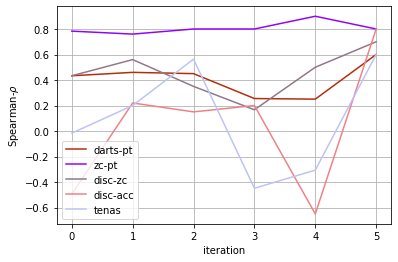

In [100]:
import matplotlib.pyplot as plt
import random

for k,v in correls.items():
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend()
plt.grid()
plt.show()

In [101]:
from scipy import stats
correl_seeds = {}
#,('tenas', seeds_tenas)
for n,reses in [('darts-pt',seeds_dartspt), ('zc-pt',seeds_zc), ('disc-zc',seeds_disczc), ('disc-acc',seeds_discacc)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

darts-pt 0 5 6 0.46666666666666656
darts-pt 1 4 5 0.45999999999999996
darts-pt 2 3 4 0.44999999999999996
darts-pt 3 2 3 0.3333333333333333
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.4333333333333333
darts-pt 1 4 5 0.43999999999999995
darts-pt 2 3 4 0.5249999999999999
darts-pt 3 2 3 0.4333333333333333
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.3833333333333333
darts-pt 1 4 5 0.36
darts-pt 2 3 4 0.475
darts-pt 3 2 3 0.26666666666666666
darts-pt 4 1 2 0.19999999999999998
darts-pt 5 0 1 0.6
darts-pt 0 5 6 0.4333333333333333
darts-pt 1 4 5 0.45999999999999996
darts-pt 2 3 4 0.44999999999999996
darts-pt 3 2 3 0.25476269788227823
darts-pt 4 1 2 0.25
darts-pt 5 0 1 0.6
zc-pt 0 5 6 0.7333333333333333
zc-pt 1 4 5 0.6599999999999999
zc-pt 2 3 4 0.8249999999999998
zc-pt 3 2 3 0.5333333333333333
zc-pt 4 1 2 0.6499999999999999
zc-pt 5 0 1 0.7999999999999999
zc-pt 0 5 6 0.7666666666666665
zc-pt 1 4 5 0.7
zc-pt 2 3 4 0.6749999999999998
zc-pt 3 2 3 0.5333333333333333
zc-pt 4 1

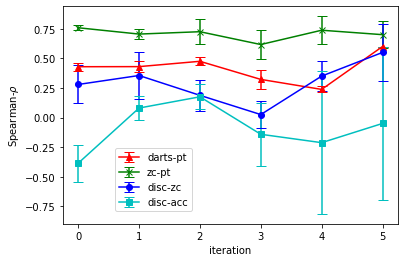

In [110]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's', '*')) 
color = itertools.cycle(('r', 'g', 'b', 'c', 'y')) 

x = np.array([0, 1, 2, 3, 4, 5])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color),capsize=5.0)
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.4, 0.37))
#plt.grid()
plt.savefig(pathlib.Path('op_correl_time').with_suffix('.pdf'), bbox_inches='tight')
plt.show()

In [51]:
!pwd

/home/u1650783/workspace/ZeroCostDarts/zerocostnas


In [84]:
disc_acc_raw_s1 = {100: {0: {0: 83.267998,
           1: 82.239998,
           2: 64.995995,
           3: 71.755997,
           4: 54.307999},
       1: {0: 84.935997,
           1: 83.231995,
           2: 73.231995,
           3: 76.771996,
           4: 83.451996},
       2: {0: 83.867996,
           1: 83.727997,
           2: 77.332001,
           3: 76.832001,
           4: 83.251999},
       3: {0: 65.767998,
           1: 84.444,
           2: 75.816002,
           3: 78.68,
           4: 62.703999},
       4: {0: 83.571999,
           1: 82.028,
           2: 75.023994,
           3: 76.087997,
           4: 82.563995},
       5: {0: 83.947998,
           1: 82.447998,
           2: 66.692001,
           3: 71.363998,
           4: 80.311996}},
 105: {1: {0: 81.568001,
           1: 80.867996,
           2: 63.287998,
           3: 68.956001,
           4: 79.568001},
       2: {0: 83.264,
           1: 83.900002,
           2: 83.091995,
           3: 83.507996,
           4: 83.231995},
       3: {0: 65.103996,
           1: 82.327995,
           2: 61.32,
           3: 70.596001,
           4: 79.484001},
       4: {0: 83.587997,
           1: 83.251999,
           2: 83.947998,
           3: 83.243996,
           4: 83.916},
       5: {0: 82.051994,
           1: 80.687996,
           2: 65.776001,
           3: 72.795998,
           4: 78.671997}},
 110: {2: {0: 82.907997,
           1: 82.255997,
           2: 82.551994,
           3: 82.136002,
           4: 82.339996},
       3: {0: 10.084,
           1: 61.68,
           2: 61.051998,
           3: 62.375999,
           4: 42.952},
       4: {0: 82.103996,
           1: 81.891998,
           2: 82.423996,
           3: 82.431999,
           4: 82.723999},
       5: {0: 82.563995,
           1: 82.019997,
           2: 81.739998,
           3: 82.459999,
           4: 82.327995}},
 115: {3: {0: 10.084,
           1: 62.743999,
           2: 60.143997,
           3: 64.223999,
           4: 43.596001},
       4: {0: 82.556,
           1: 81.959999,
           2: 82.199997,
           3: 81.944,
           4: 82.556},
       5: {0: 81.5,
           1: 82.192001,
           2: 82.515999,
           3: 82.911995,
           4: 82.307999}},
 120: {4: {0: 71.068001,
           1: 72.563995,
           2: 72.911995,
           3: 72.860001,
           4: 71.192001},
       5: {0: 72.295998,
           1: 71.995995,
           2: 72.515999,
           3: 72.327995,
           4: 72.203995}},
 125: {5: {0: 75.403999,
           1: 75.723999,
           2: 76.099998,
           3: 75.951996,
           4: 76.051994}}}

disc_acc_raw_s0 = {100: {0: {0: 83.647995,
           1: 81.751999,
           2: 63.887997,
           3: 71.451996,
           4: 78.32},
       1: {0: 84.984001,
           1: 83.519997,
           2: 73.692001,
           3: 72.860001,
           4: 84.823997},
       2: {0: 83.403999,
           1: 83.323997,
           2: 75.007996,
           3: 73.739998,
           4: 82.587997},
       3: {0: 71.811996,
           1: 83.479996,
           2: 67.495995,
           3: 77.711998,
           4: 60.283997},
       4: {0: 85.311996,
           1: 83.164001,
           2: 73.040001,
           3: 76.495995,
           4: 83.267998},
       5: {0: 83.612,
           1: 82.155998,
           2: 72.755997,
           3: 72.832001,
           4: 79.963997}},
 105: {1: {0: 81.304001,
           1: 81.811996,
           2: 64.323997,
           3: 66.552002,
           4: 79.675995},
       2: {0: 84.208,
           1: 84.431999,
           2: 84.307999,
           3: 83.720001,
           4: 83.928001},
       3: {0: 63.119999,
           1: 83.159996,
           2: 61.039997,
           3: 74.528,
           4: 77.367996},
       4: {0: 83.575996,
           1: 83.907997,
           2: 84.307999,
           3: 83.799995,
           4: 84.283997},
       5: {0: 81.975998,
           1: 81.251999,
           2: 62.236,
           3: 71.835999,
           4: 79.103996}},
 110: {2: {0: 81.367996,
           1: 82.043999,
           2: 81.967995,
           3: 80.767998,
           4: 82.687996},
       3: {0: 67.028,
           1: 79.287994,
           2: 61.599998,
           3: 77.040001,
           4: 55.607998},
       4: {0: 80.547997,
           1: 81.795998,
           2: 80.075996,
           3: 82.019997,
           4: 82.556},
       5: {0: 82.115997,
           1: 79.435997,
           2: 60.523998,
           3: 69.851997,
           4: 77.348}},
 115: {3: {0: 70.171997,
           1: 77.827995,
           2: 61.208,
           3: 72.416,
           4: 57.087997},
       4: {0: 81.827995,
           1: 81.279999,
           2: 82.271996,
           3: 81.551994,
           4: 82.259995},
       5: {0: 82.164001,
           1: 80.063995,
           2: 62.076,
           3: 68.720001,
           4: 78.159996}},
 120: {4: {0: 80.736,
           1: 78.447998,
           2: 80.195999,
           3: 78.848,
           4: 80.495995},
       5: {0: 61.695999,
           1: 45.815998,
           2: 60.891998,
           3: 77.003998,
           4: 35.896}},
 125: {5: {0: 61.335999,
           1: 46.503998,
           2: 59.327999,
           3: 76.215996,
           4: 34.700001}}}
disc_acc_raw_s2 = {100: {0: {0: 83.967995,
           1: 81.947998,
           2: 65.519997,
           3: 69.979996,
           4: 79.667999},
       1: {0: 84.411995,
           1: 83.043999,
           2: 66.131996,
           3: 79.047997,
           4: 83.759995},
       2: {0: 83.343994,
           1: 83.236,
           2: 79.332001,
           3: 79.259995,
           4: 84.075996},
       3: {0: 65.292,
           1: 84.203995,
           2: 77.231995,
           3: 80.631996,
           4: 53.559998},
       4: {0: 84.091995,
           1: 82.879997,
           2: 77.568001,
           3: 79.855995,
           4: 83.351997},
       5: {0: 83.963997,
           1: 81.355995,
           2: 69.187996,
           3: 75.580002,
           4: 80.783997}},
 105: {1: {0: 81.183998,
           1: 81.407997,
           2: 64.503998,
           3: 69.040001,
           4: 78.515999},
       2: {0: 83.907997,
           1: 83.279999,
           2: 84.051994,
           3: 83.484001,
           4: 83.863998},
       3: {0: 65.159996,
           1: 82.755997,
           2: 63.699997,
           3: 78.203995,
           4: 79.895996},
       4: {0: 84.211998,
           1: 84.323997,
           2: 84.315994,
           3: 84.379997,
           4: 84.208},
       5: {0: 80.900002,
           1: 81.103996,
           2: 65.068001,
           3: 72.028,
           4: 78.587997}},
 110: {2: {0: 82.599998,
           1: 82.584,
           2: 81.991997,
           3: 82.292,
           4: 82.631996},
       3: {0: 68.531998,
           1: 78.323997,
           2: 64.059998,
           3: 79.231995,
           4: 70.063995},
       4: {0: 82.159996,
           1: 81.183998,
           2: 82.155998,
           3: 82.559998,
           4: 82.155998},
       5: {0: 80.995995,
           1: 79.736,
           2: 63.264,
           3: 70.895996,
           4: 78.543999}},
 115: {3: {0: 73.103996,
           1: 78.596001,
           2: 63.607998,
           3: 80.512001,
           4: 60.699997},
       4: {0: 81.515999,
           1: 82.615997,
           2: 81.155998,
           3: 82.195999,
           4: 82.467995},
       5: {0: 81.647995,
           1: 80.276001,
           2: 63.188,
           3: 70.543999,
           4: 78.619995}},
 120: {4: {0: 82.664001,
           1: 82.687996,
           2: 82.547997,
           3: 82.608002,
           4: 82.695999},
       5: {0: 79.383995,
           1: 82.528,
           2: 69.895996,
           3: 68.995995,
           4: 80.755997}},
 125: {5: {0: 80.372002,
           1: 83.655998,
           2: 68.236,
           3: 69.288002,
           4: 82.003998}}}
disc_acc_raw_s3 = {100: {0: {0: 83.743996,
           1: 81.891998,
           2: 64.519997,
           3: 71.683998,
           4: 55.023998},
       1: {0: 85.231995,
           1: 84.031998,
           2: 74.951996,
           3: 76.248001,
           4: 80.835999},
       2: {0: 84.804001,
           1: 83.507996,
           2: 79.519997,
           3: 78.711998,
           4: 84.063995},
       3: {0: 75.248001,
           1: 83.643997,
           2: 76.671997,
           3: 75.779999,
           4: 83.18},
       4: {0: 84.047997,
           1: 82.711998,
           2: 79.815994,
           3: 77.484001,
           4: 83.807999},
       5: {0: 85.220001,
           1: 81.624001,
           2: 71.127998,
           3: 77.391998,
           4: 81.519997}},
 105: {1: {0: 82.315994,
           1: 81.619995,
           2: 63.607998,
           3: 71.279999,
           4: 79.627998},
       2: {0: 83.959999,
           1: 83.792,
           2: 84.087997,
           3: 84.467995,
           4: 84.568001},
       3: {0: 64.563995,
           1: 83.171997,
           2: 64.127998,
           3: 75.447998,
           4: 80.547997},
       4: {0: 84.096001,
           1: 84.279999,
           2: 84.547997,
           3: 84.799995,
           4: 83.515999},
       5: {0: 81.975998,
           1: 81.283997,
           2: 66.223999,
           3: 73.743996,
           4: 79.136002}},
 110: {2: {0: 82.276001,
           1: 81.860001,
           2: 82.299995,
           3: 82.139999,
           4: 81.751999},
       3: {0: 10.084,
           1: 60.967999,
           2: 60.216,
           3: 67.484001,
           4: 42.851997},
       4: {0: 81.720001,
           1: 81.931999,
           2: 82.776001,
           3: 82.559998,
           4: 82.720001},
       5: {0: 82.279999,
           1: 82.040001,
           2: 82.183998,
           3: 81.540001,
           4: 82.0}},
 115: {3: {0: 10.084,
           1: 60.556,
           2: 57.475998,
           3: 66.759995,
           4: 42.584},
       4: {0: 82.339996,
           1: 81.495995,
           2: 82.403999,
           3: 82.327995,
           4: 82.872002},
       5: {0: 82.360001,
           1: 83.152,
           2: 83.051994,
           3: 81.367996,
           4: 83.096001}},
 120: {4: {0: 74.167999,
           1: 74.056,
           2: 74.075996,
           3: 73.584,
           4: 74.195999},
       5: {0: 74.139999,
           1: 72.283997,
           2: 73.528,
           3: 73.507996,
           4: 73.751999}},
 125: {5: {0: 76.584,
           1: 76.215996,
           2: 75.783997,
           3: 76.444,
           4: 76.835999}}}

In [85]:
disc_acc_raw_25_s0 = {100: {0: {0: 83.855995,
           1: 82.695999,
           2: 79.720001,
           3: 81.667999,
           4: 84.287994},
       1: {0: 84.815994,
           1: 84.956001,
           2: 83.720001,
           3: 81.827995,
           4: 84.540001},
       2: {0: 85.5,
           1: 85.619995,
           2: 84.0,
           3: 83.512001,
           4: 84.403999},
       3: {0: 84.255997,
           1: 83.951996,
           2: 82.647995,
           3: 83.731995,
           4: 83.127998},
       4: {0: 84.159996,
           1: 83.827995,
           2: 84.339996,
           3: 83.579994,
           4: 83.563995},
       5: {0: 82.671997,
           1: 84.568001,
           2: 83.659996,
           3: 82.523994,
           4: 83.372002}},
 125: {1: {0: 83.423996,
           1: 84.323997,
           2: 83.431999,
           3: 83.031998,
           4: 82.916},
       2: {0: 83.416,
           1: 84.731995,
           2: 82.028,
           3: 81.963997,
           4: 82.584},
       3: {0: 81.687996,
           1: 82.167999,
           2: 80.655998,
           3: 83.416,
           4: 81.512001},
       4: {0: 84.363998,
           1: 83.771996,
           2: 75.963997,
           3: 79.195999,
           4: 83.951996},
       5: {0: 82.551994,
           1: 82.963997,
           2: 83.531998,
           3: 84.075996,
           4: 83.491997}},
 150: {2: {0: 82.203995,
           1: 82.059998,
           2: 83.167999,
           3: 82.348,
           4: 82.335999},
       3: {0: 79.603996,
           1: 82.664001,
           2: 74.519997,
           3: 84.311996,
           4: 71.652},
       4: {0: 81.916,
           1: 80.695999,
           2: 73.900002,
           3: 76.916,
           4: 82.907997},
       5: {0: 82.208,
           1: 82.203995,
           2: 81.276001,
           3: 84.187996,
           4: 80.255997}},
 175: {3: {0: 68.047997,
           1: 81.315994,
           2: 80.087997,
           3: 83.928001,
           4: 74.515999},
       4: {0: 83.931999,
           1: 82.547997,
           2: 78.699997,
           3: 80.556,
           4: 81.195999},
       5: {0: 82.323997,
           1: 79.639999,
           2: 80.259995,
           3: 84.040001,
           4: 66.335999}},
 200: {4: {0: 85.295998,
           1: 83.995995,
           2: 84.579994,
           3: 84.979996,
           4: 83.872002},
       5: {0: 84.279999,
           1: 83.931999,
           2: 84.944,
           3: 84.903999,
           4: 83.075996}},
 225: {5: {0: 84.407997,
           1: 85.540001,
           2: 79.779999,
           3: 79.087997,
           4: 85.0}}}

disc_acc_raw_25_s1 = {100: {0: {0: 82.655998,
           1: 83.664001,
           2: 80.556,
           3: 81.687996,
           4: 83.935997},
       1: {0: 83.931999,
           1: 83.835999,
           2: 82.991997,
           3: 82.664001,
           4: 84.152},
       2: {0: 84.779999,
           1: 84.991997,
           2: 84.655998,
           3: 84.127998,
           4: 84.751999},
       3: {0: 85.18,
           1: 84.171997,
           2: 83.807999,
           3: 83.795998,
           4: 84.543999},
       4: {0: 84.019997,
           1: 84.931999,
           2: 84.075996,
           3: 84.456001,
           4: 84.879997},
       5: {0: 83.459999,
           1: 83.487999,
           2: 81.332001,
           3: 83.475998,
           4: 82.699997}},
 125: {1: {0: 82.403999,
           1: 84.360001,
           2: 83.299995,
           3: 84.543999,
           4: 83.467995},
       2: {0: 83.995995,
           1: 83.895996,
           2: 83.243996,
           3: 83.119995,
           4: 83.855995},
       3: {0: 80.575996,
           1: 84.023994,
           2: 83.299995,
           3: 83.223999,
           4: 82.187996},
       4: {0: 83.715996,
           1: 83.843994,
           2: 78.931999,
           3: 80.467995,
           4: 83.703995},
       5: {0: 80.056,
           1: 83.599998,
           2: 84.327995,
           3: 84.152,
           4: 81.447998}},
 150: {2: {0: 83.203995,
           1: 83.531998,
           2: 84.991997,
           3: 84.956001,
           4: 83.615997},
       3: {0: 84.428001,
           1: 83.416,
           2: 81.451996,
           3: 85.040001,
           4: 83.031998},
       4: {0: 84.711998,
           1: 83.323997,
           2: 80.68,
           3: 81.551994,
           4: 82.451996},
       5: {0: 82.631996,
           1: 83.243996,
           2: 83.959999,
           3: 83.187996,
           4: 81.779999}},
 175: {3: {0: 82.523994,
           1: 83.208,
           2: 82.664001,
           3: 81.875999,
           4: 82.639999},
       4: {0: 85.119995,
           1: 83.276001,
           2: 79.472,
           3: 79.776001,
           4: 82.431999},
       5: {0: 81.248001,
           1: 83.956001,
           2: 80.047997,
           3: 80.519997,
           4: 81.916}},
 200: {4: {0: 85.147995,
           1: 80.743996,
           2: 77.528,
           3: 76.159996,
           4: 81.956001},
       5: {0: 70.891998,
           1: 84.192001,
           2: 74.743996,
           3: 78.667999,
           4: 81.068001}},
 225: {5: {0: 71.748001,
           1: 85.199997,
           2: 79.939995,
           3: 80.844002,
           4: 83.327995}}}

disc_acc_raw_25_s2 = {100: {0: {0: 84.155998,
           1: 83.139999,
           2: 80.32,
           3: 81.071999,
           4: 83.335999},
       1: {0: 83.112,
           1: 84.755997,
           2: 82.035995,
           3: 83.348,
           4: 85.131996},
       2: {0: 83.655998,
           1: 84.715996,
           2: 84.456001,
           3: 83.599998,
           4: 85.435997},
       3: {0: 84.447998,
           1: 84.407997,
           2: 84.32,
           3: 82.531998,
           4: 83.119995},
       4: {0: 84.779999,
           1: 84.208,
           2: 83.947998,
           3: 84.155998,
           4: 84.351997},
       5: {0: 82.963997,
           1: 83.535995,
           2: 83.236,
           3: 82.835999,
           4: 83.659996}},
 125: {1: {0: 82.047997,
           1: 83.411995,
           2: 79.451996,
           3: 81.183998,
           4: 81.619995},
       2: {0: 80.655998,
           1: 81.283997,
           2: 83.655998,
           3: 83.012001,
           4: 81.764},
       3: {0: 78.895996,
           1: 80.419998,
           2: 77.379997,
           3: 84.607994,
           4: 82.304001},
       4: {0: 82.711998,
           1: 82.411995,
           2: 84.615997,
           3: 84.375999,
           4: 82.419998},
       5: {0: 83.739998,
           1: 83.315994,
           2: 80.407997,
           3: 82.056,
           4: 81.931999}},
 150: {2: {0: 80.991997,
           1: 82.5,
           2: 82.615997,
           3: 83.335999,
           4: 81.311996},
       3: {0: 81.444,
           1: 81.639999,
           2: 76.804001,
           3: 82.851997,
           4: 74.995995},
       4: {0: 81.556,
           1: 82.723999,
           2: 82.559998,
           3: 82.043999,
           4: 82.872002},
       5: {0: 83.203995,
           1: 83.407997,
           2: 78.903999,
           3: 81.979996,
           4: 82.68}},
 175: {3: {0: 82.895996,
           1: 81.023994,
           2: 76.164001,
           3: 84.195999,
           4: 69.591995},
       4: {0: 81.379997,
           1: 83.259995,
           2: 82.164001,
           3: 81.931999,
           4: 82.171997},
       5: {0: 82.343994,
           1: 82.103996,
           2: 78.223999,
           3: 80.112,
           4: 82.271996}},
 200: {4: {0: 85.112,
           1: 85.568001,
           2: 85.243996,
           3: 85.227997,
           4: 85.311996},
       5: {0: 83.307999,
           1: 85.136002,
           2: 80.503998,
           3: 80.467995,
           4: 84.827995}},
 225: {5: {0: 81.231995,
           1: 85.307999,
           2: 80.127998,
           3: 80.951996,
           4: 84.759995}}}

disc_acc_raw_25_s3 = {100: {0: {0: 84.271996,
           1: 84.523994,
           2: 79.667999,
           3: 81.900002,
           4: 83.823997},
       1: {0: 83.959999,
           1: 84.292,
           2: 84.32,
           3: 83.451996,
           4: 84.299995},
       2: {0: 83.68,
           1: 84.764,
           2: 84.587997,
           3: 84.112,
           4: 85.339996},
       3: {0: 82.779999,
           1: 83.811996,
           2: 83.832001,
           3: 83.783997,
           4: 83.832001},
       4: {0: 84.579994,
           1: 84.587997,
           2: 84.843994,
           3: 84.096001,
           4: 83.715996},
       5: {0: 85.075996,
           1: 84.304001,
           2: 83.287994,
           3: 83.823997,
           4: 84.559998}},
 125: {1: {0: 84.068001,
           1: 81.540001,
           2: 83.783997,
           3: 84.643997,
           4: 84.659996},
       2: {0: 84.147995,
           1: 83.220001,
           2: 84.043999,
           3: 84.531998,
           4: 84.32},
       3: {0: 84.0,
           1: 83.967995,
           2: 83.391998,
           3: 84.287994,
           4: 83.591995},
       4: {0: 84.304001,
           1: 83.227997,
           2: 82.056,
           3: 83.379997,
           4: 83.547997},
       5: {0: 82.888,
           1: 82.612,
           2: 84.731995,
           3: 83.815994,
           4: -1}},
 150: {2: {0: 83.32,
           1: 83.675995,
           2: 83.692001,
           3: 84.423996,
           4: 84.164001},
       3: {0: 84.875999,
           1: 84.195999,
           2: 82.068001,
           3: 83.764,
           4: 84.107994},
       4: {0: 83.075996,
           1: 83.879997,
           2: 79.683998,
           3: 83.096001,
           4: 83.923996},
       5: {0: 83.139999,
           1: 67.435997,
           2: 82.984001,
           3: 83.519997,
           4: 65.540001}},
 175: {3: {0: 85.287994,
           1: 83.584,
           2: 80.624001,
           3: 83.587997,
           4: 82.695999},
       4: {0: 85.843994,
           1: 83.767998,
           2: 80.612,
           3: 81.928001,
           4: 82.720001},
       5: {0: 82.063995,
           1: 63.295998,
           2: 83.523994,
           3: 83.175995,
           4: 64.627998}},
 200: {4: {0: 78.456001,
           1: 84.727997,
           2: 75.619995,
           3: 76.295998,
           4: 84.159996},
       5: {0: 82.444,
           1: 82.367996,
           2: 80.323997,
           3: 81.431999,
           4: 69.383995}},
 225: {5: {0: 72.18,
           1: 77.375999,
           2: 80.659996,
           3: 80.944,
           4: 63.379997}}}

In [ ]:
 225: {5: {0: 72.18, 2
           1: 77.375999, 3
           2: 80.659996, 4
           3: 80.944, 5
           4: 63.379997}}} 1

In [ ]:
 225: {5: {0: 81.231995, 3
           1: 85.307999, 5
           2: 80.127998, 1
           3: 80.951996, 2 
           4: 84.759995}}} 4

In [ ]:
 225: {5: {0: 71.748001, 1
           1: 85.199997, 5
           2: 79.939995, 2
           3: 80.844002, 3
           4: 83.327995}}} 4

In [ ]:
 225: {5: {0: 84.407997,
           1: 85.540001,
           2: 79.779999,
           3: 79.087997,
           4: 85.0}}}